# Correlation and Covariance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
DATASET_SIZE = 100

## Covariance

$\Large \text{cov}(X, Y) = \frac{{\sum_{i=1}^{N} (x_i - \mu_x)(y_i - \mu_y)}}{{N - 1}}$

Where:
- $\mu_x$: mean of $x$
- $\mu_y$: mean of $y$
- $N$ is the total number of data samples

In [3]:
def covariance(x, y):
    
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    
    covariance = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)
    
    return covariance

## Correlation
Correlation: Normalized covariance

$\Large \rho_{XY} = \frac{{\text{cov}(X, Y)}}{{\sigma_X \cdot \sigma_Y}}$

Where:
- $\rho_{XY}$: correlation coefficient
- $\sigma_X$: standart deviation of $X$
- $\sigma_Y$: standart deviation of $Y$

In [4]:
def correlation(x, y):
    
    cov = covariance(x, y)
    
    # ddof: degrees of freedom (N - ddof)
    # ddof=1 to calculate sample standard deviation
    std_x = np.std(x, ddof=1)  
    std_y = np.std(y, ddof=1)
    
    correlation = cov / (std_x * std_y)
    
    return correlation

## Test using Synthetic Data
### Correlated Example

Covariance: 6.7739
Correlation: 0.9962


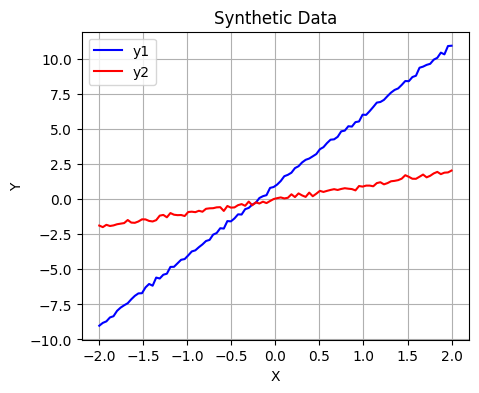

In [5]:
x = np.linspace(-2.0, 2.0, DATASET_SIZE)

y1 = 5*x + 1 + 0.1*np.random.randn(len(x)) 
y2 = x + 0.1*np.random.randn(len(x)) 

plt.figure(figsize=(5, 4))
plt.plot(x, y1, c='blue', label='y1')
plt.plot(x, y2, c='red', label='y2')
plt.title('Synthetic Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid('on')
plt.legend()

print(f'Covariance: {covariance(y1, y2):.4f}')
print(f'Correlation: {correlation(y1, y2):.4f}')

### Reverse Correlated Example 

Covariance: -5.4720
Correlation: -0.9980


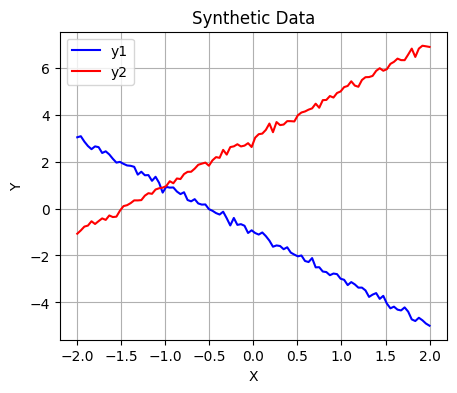

In [6]:
x = np.linspace(-2.0, 2.0, DATASET_SIZE)

y1 = -2* x - 1 + 0.1*np.random.randn(len(y1)) 
y2 = 2 * x + 3 + 0.1*np.random.randn(len(y2)) 

plt.figure(figsize=(5, 4))
plt.plot(x, y1, c='blue', label='y1')
plt.plot(x, y2, c='red', label='y2')
plt.title('Synthetic Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid('on')
plt.legend()

print(f'Covariance: {covariance(y1, y2):.4f}')
print(f'Correlation: {correlation(y1, y2):.4f}')

### Uncorrelated Example 

Covariance: -0.0516
Correlation: -0.2222


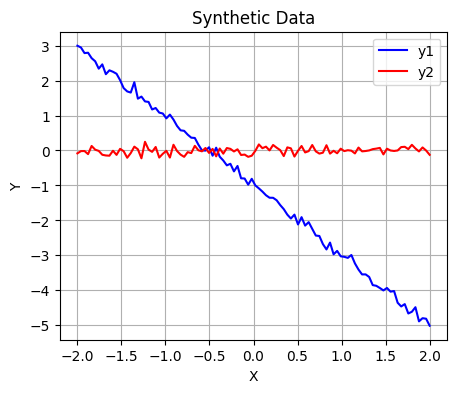

In [7]:
x = np.linspace(-2.0, 2.0, DATASET_SIZE)

y1 = -2* x - 1 + 0.1*np.random.randn(len(y1)) 
y2 = 0.1*np.random.randn(len(y2)) 

plt.figure(figsize=(5, 4))
plt.plot(x, y1, c='blue', label='y1')
plt.plot(x, y2, c='red', label='y2')
plt.title('Synthetic Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid('on')
plt.legend()

print(f'Covariance: {covariance(y1, y2):.4f}')
print(f'Correlation: {correlation(y1, y2):.4f}')

## Autocorrelation

Correlation between a sequence and a lagged version of itself

$\Large \rho_k = \frac{{\sum_{t=k+1}^{N} (x_t - \mu_x)(x_{t-k} - \mu_x)}}{{\sum_{t=1}^{N} (y_t - \mu_y)^2}}$


Where:
- $x_t$ and $x_{t-k}$ represents the observation at time $t$ and $t-k$ respectively
- $\mu_x$ is the mean of the time series
- $N$ is the total number of time series data samples
- $k$ is the lag

In [8]:
def autocorrelation(time_series, lag):
    mean = np.mean(time_series)
    
    numerator = np.sum((time_series[lag:] - mean) * (time_series[:-lag] - mean))
    denominator = np.sum((time_series - mean) ** 2)
    
    autocorrelation = numerator / denominator
    
    return autocorrelation

## Strong Autocorrelation Example 

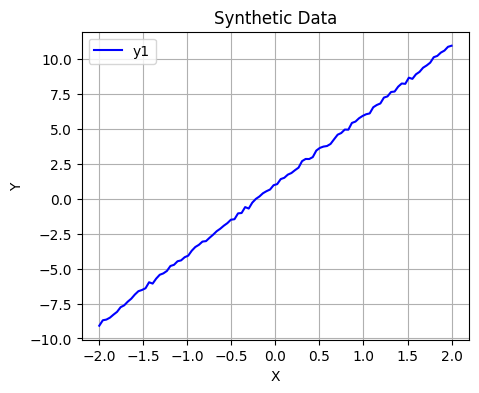

In [9]:
x = np.linspace(-2.0, 2.0, DATASET_SIZE)

y1 = 5*x + 1 + 0.1*np.random.randn(len(y1)) 

plt.figure(figsize=(5, 4))
plt.plot(x, y1, c='blue', label='y1')
plt.title('Synthetic Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid('on')
plt.legend()

### Calculate autocorrelation coefficients at different lags

Autocorrelation at lag 1: 0.9695
Autocorrelation at lag 2: 0.9395
Autocorrelation at lag 3: 0.9092
Autocorrelation at lag 4: 0.8786
Autocorrelation at lag 5: 0.8482
Autocorrelation at lag 6: 0.8175
Autocorrelation at lag 7: 0.7878
Autocorrelation at lag 8: 0.7580
Autocorrelation at lag 9: 0.7284


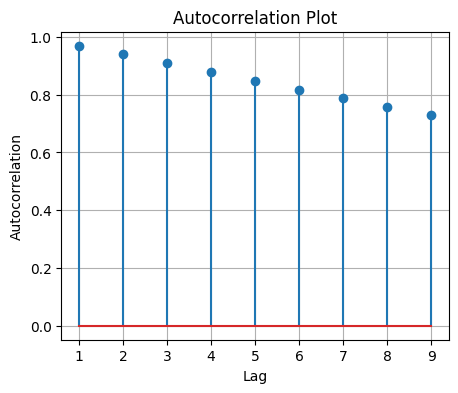

In [10]:
MAX_LAGS = 10
lags = range(1, MAX_LAGS)
autocorrelation_values = [autocorrelation(y1, lag) for lag in lags]

# Print autocorrelation coefficients for each lag
for lag, _autocorrelation in zip(lags, autocorrelation_values):
    print(f'Autocorrelation at lag {lag}: {_autocorrelation:.4f}')

plt.figure(figsize=(5, 4))
plt.stem(lags, autocorrelation_values)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid('on')

## Second Strong Autocorrelation Example 

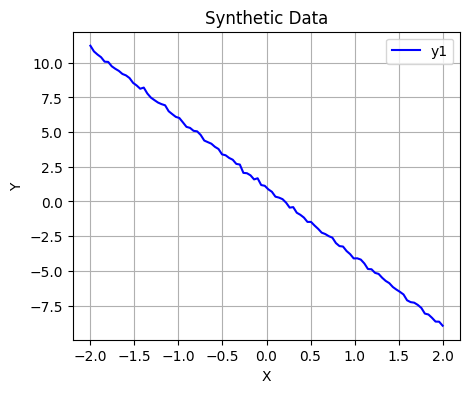

In [11]:
x = np.linspace(-2.0, 2.0, DATASET_SIZE)

y1 = -5*x + 1 + 0.1*np.random.randn(len(y1)) 

plt.figure(figsize=(5, 4))
plt.plot(x, y1, c='blue', label='y1')
plt.title('Synthetic Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid('on')
plt.legend()

### Calculate autocorrelation coefficients at different lags

Autocorrelation at lag 1: 0.9692
Autocorrelation at lag 2: 0.9395
Autocorrelation at lag 3: 0.9093
Autocorrelation at lag 4: 0.8794
Autocorrelation at lag 5: 0.8500
Autocorrelation at lag 6: 0.8196
Autocorrelation at lag 7: 0.7903
Autocorrelation at lag 8: 0.7611
Autocorrelation at lag 9: 0.7317


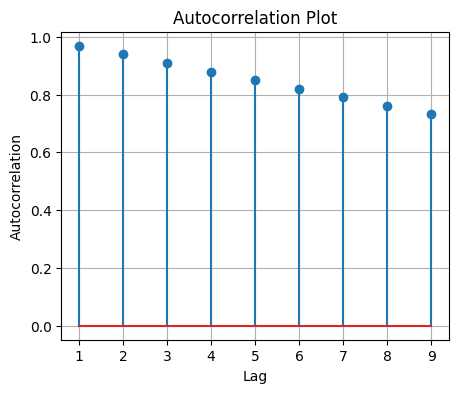

In [12]:
MAX_LAGS = 10
lags = range(1, MAX_LAGS)
autocorrelation_values = [autocorrelation(y1, lag) for lag in lags]

for lag, _autocorrelation in zip(lags, autocorrelation_values):
    print(f'Autocorrelation at lag {lag}: {_autocorrelation:.4f}')

plt.figure(figsize=(5, 4))
plt.stem(lags, autocorrelation_values)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid('on')

## Weak Autocorrelation Example 

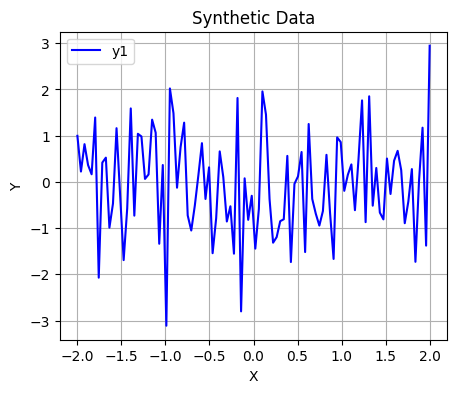

In [13]:
x = np.linspace(-2.0, 2.0, DATASET_SIZE)

y1 = np.random.randn(len(y1)) 

plt.figure(figsize=(5, 4))
plt.plot(x, y1, c='blue', label='y1')
plt.title('Synthetic Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid('on')
plt.legend()

### Calculate autocorrelation coefficients at different lags

Autocorrelation at lag 1: -0.1860
Autocorrelation at lag 2: -0.0030
Autocorrelation at lag 3: 0.0273
Autocorrelation at lag 4: -0.0278
Autocorrelation at lag 5: -0.0671
Autocorrelation at lag 6: -0.0068
Autocorrelation at lag 7: 0.0694
Autocorrelation at lag 8: 0.0159
Autocorrelation at lag 9: 0.0263


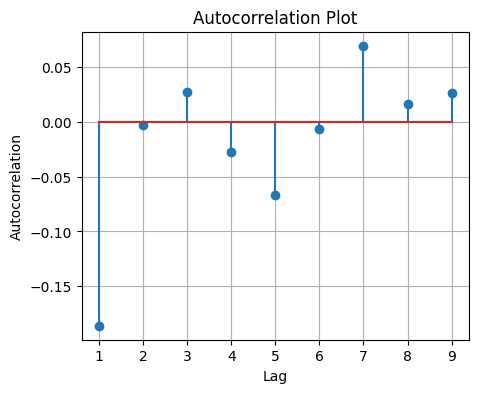

In [14]:
MAX_LAGS = 10
lags = range(1, MAX_LAGS)
autocorrelation_values = [autocorrelation(y1, lag) for lag in lags]

for lag, _autocorrelation in zip(lags, autocorrelation_values):
    print(f'Autocorrelation at lag {lag}: {_autocorrelation:.4f}')

plt.figure(figsize=(5, 4))
plt.stem(lags, autocorrelation_values)
plt.title('Autocorrelation Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid('on')